In [1]:
from datetime import timedelta, datetime, timezone

from matplotlib import pyplot as plt
from sunpy.net.fido_factory import UnifiedResponse

from data.flux.spec.channel import FrequencyBand, FluxChannel
from data.flux.spec.data import Flux
from utils.range import DateTimeRange

# TODO: merge data fetching with _clean.ipynb

# Section: flux, label
sections: list[tuple[dict[FluxChannel, Flux], DateTimeRange, str]] = []

In [2]:
"""
Load interesting sections from the archive data.
"""
from importer.flux.archive import _from_timeseries, _select_best_sources
from sunpy.timeseries import TimeSeries
from sunpy.net import Fido
from sunpy.net import attrs

# Sample dates with various edge cases
ARCHIVE_DATES = (
    '1996-07-07', '2002-12-19', '2002-12-20', '2009-09-22', '2017-09-06'
)
ARCHIVE_SECTION_SIZE = timedelta(days=3)


def _search(time_range: DateTimeRange) -> dict[int, UnifiedResponse]:
    results = Fido.search(
        attrs.Time(time_range.start, time_range.end),
        attrs.Instrument("XRS")
    )[0]
    return {
        satellite: _select_best_sources(
            results[results['SatelliteNumber'] == satellite]
        ) for satellite in set(results['SatelliteNumber'])
    }


for date_str in ARCHIVE_DATES:
    start_date = datetime.fromisoformat(date_str).replace(tzinfo=timezone.utc)
    time_range = DateTimeRange(start_date, start_date + ARCHIVE_SECTION_SIZE)
    print(f'Loading {time_range}')

    satellite_files = {}
    try:
        search_results = _search(time_range)
        if len(search_results) <= 1:
            print('Only one or no satellites found. Skipping...')
            continue
        satellite_files = {
            satellite: Fido.fetch(results)
            for satellite, results in search_results.items()
        }
    except Exception as e:
        print(f'Failed to search and download {date_str}: {e}')
    if len(satellite_files) == 0:
        print('No data found.')
        continue

    channels = {}
    for satellite, files in satellite_files.items():
        if len(files) == 0:
            print(f'Download failed for satellite {satellite}.')
            continue

        series = TimeSeries(files, concatenate=True).to_dataframe()
        for band in (FrequencyBand.SHORT, FrequencyBand.LONG):
            channels[FluxChannel(satellite, band, False)] = _from_timeseries(series, band)

    sections.append((channels, time_range, date_str))

Loading 1996-07-07 00:00:00+00:00 - 1996-07-10 00:00:00+00:00


Files Downloaded:   0%|          | 0/4 [00:00<?, ?file/s]

Files Downloaded:   0%|          | 0/4 [00:00<?, ?file/s]

Files Downloaded:   0%|          | 0/4 [00:00<?, ?file/s]

Loading 2002-12-19 00:00:00+00:00 - 2002-12-22 00:00:00+00:00


Files Downloaded:   0%|          | 0/4 [00:00<?, ?file/s]

Files Downloaded:   0%|          | 0/4 [00:00<?, ?file/s]

Exception ignored in: <function BaseEventLoop.__del__ at 0x7fc76dbacea0>
Traceback (most recent call last):
  File "/home/tschai/micromamba/envs/heliotime-server/lib/python3.12/asyncio/base_events.py", line 728, in __del__
    self.close()
  File "/home/tschai/micromamba/envs/heliotime-server/lib/python3.12/asyncio/unix_events.py", line 71, in close
    self.remove_signal_handler(sig)
  File "/home/tschai/micromamba/envs/heliotime-server/lib/python3.12/asyncio/unix_events.py", line 160, in remove_signal_handler
    signal.signal(sig, handler)
  File "/home/tschai/micromamba/envs/heliotime-server/lib/python3.12/signal.py", line 58, in signal
    handler = _signal.signal(_enum_to_int(signalnum), _enum_to_int(handler))
              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
ValueError: signal only works in main thread of the main interpreter


Loading 2002-12-20 00:00:00+00:00 - 2002-12-23 00:00:00+00:00


Files Downloaded:   0%|          | 0/4 [00:00<?, ?file/s]

Exception ignored in: <function BaseEventLoop.__del__ at 0x7fc76dbacea0>
Traceback (most recent call last):
  File "/home/tschai/micromamba/envs/heliotime-server/lib/python3.12/asyncio/base_events.py", line 728, in __del__
    self.close()
  File "/home/tschai/micromamba/envs/heliotime-server/lib/python3.12/asyncio/unix_events.py", line 71, in close
    self.remove_signal_handler(sig)
  File "/home/tschai/micromamba/envs/heliotime-server/lib/python3.12/asyncio/unix_events.py", line 160, in remove_signal_handler
    signal.signal(sig, handler)
  File "/home/tschai/micromamba/envs/heliotime-server/lib/python3.12/signal.py", line 58, in signal
    handler = _signal.signal(_enum_to_int(signalnum), _enum_to_int(handler))
              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
ValueError: signal only works in main thread of the main interpreter


Files Downloaded:   0%|          | 0/4 [00:00<?, ?file/s]

Loading 2009-09-22 00:00:00+00:00 - 2009-09-25 00:00:00+00:00


Files Downloaded:   0%|          | 0/4 [00:00<?, ?file/s]

Exception ignored in: <function BaseEventLoop.__del__ at 0x7fc76dbacea0>
Traceback (most recent call last):
  File "/home/tschai/micromamba/envs/heliotime-server/lib/python3.12/asyncio/base_events.py", line 728, in __del__
    self.close()
  File "/home/tschai/micromamba/envs/heliotime-server/lib/python3.12/asyncio/unix_events.py", line 71, in close
    self.remove_signal_handler(sig)
  File "/home/tschai/micromamba/envs/heliotime-server/lib/python3.12/asyncio/unix_events.py", line 160, in remove_signal_handler
    signal.signal(sig, handler)
  File "/home/tschai/micromamba/envs/heliotime-server/lib/python3.12/signal.py", line 58, in signal
    handler = _signal.signal(_enum_to_int(signalnum), _enum_to_int(handler))
              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
ValueError: signal only works in main thread of the main interpreter


Files Downloaded:   0%|          | 0/4 [00:00<?, ?file/s]

Loading 2017-09-06 00:00:00+00:00 - 2017-09-09 00:00:00+00:00


Files Downloaded:   0%|          | 0/4 [00:00<?, ?file/s]

Files Downloaded:   0%|          | 0/4 [00:00<?, ?file/s]

Exception ignored in: <function BaseEventLoop.__del__ at 0x7fc76dbacea0>
Traceback (most recent call last):
  File "/home/tschai/micromamba/envs/heliotime-server/lib/python3.12/asyncio/base_events.py", line 728, in __del__
    self.close()
  File "/home/tschai/micromamba/envs/heliotime-server/lib/python3.12/asyncio/unix_events.py", line 71, in close
    self.remove_signal_handler(sig)
  File "/home/tschai/micromamba/envs/heliotime-server/lib/python3.12/asyncio/unix_events.py", line 160, in remove_signal_handler
    signal.signal(sig, handler)
  File "/home/tschai/micromamba/envs/heliotime-server/lib/python3.12/signal.py", line 58, in signal
    handler = _signal.signal(_enum_to_int(signalnum), _enum_to_int(handler))
              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
ValueError: signal only works in main thread of the main interpreter


Files Downloaded:   0%|          | 0/4 [00:00<?, ?file/s]

In [3]:
"""
Load all available live data.
Is a separate case because it is minute averaged.
"""
from importer.flux.live import _select_live_url, _from_live_json
from aiohttp import ClientSession
from data.flux.spec.channel import FrequencyBand

live_end = datetime.now(timezone.utc)
live_range = DateTimeRange(live_end - timedelta(days=7), live_end)
async with ClientSession() as session:
    channels = {}
    for primary in (True, False):
        async with session.get(_select_live_url(primary, live_range.start)) as response:
            json = await response.json()
            for band in (FrequencyBand.SHORT, FrequencyBand.LONG):
                live_flux, satellite = _from_live_json(json, band, live_range.start)
                channels[FluxChannel(satellite, band, False)] = live_flux
    sections.append((channels, live_range, 'live'))

In [4]:
import dataclasses
import importlib
import importer.flux._clean as clean_module

importlib.reload(clean_module)
clean_flux = clean_module.clean_flux

for channels, time_range, _ in sections:
    # list() because cannot modify dict while iterating
    for channel, flux in list(channels.items()):
        channels[dataclasses.replace(channel, is_clean=True)] = clean_flux(flux, time_range)

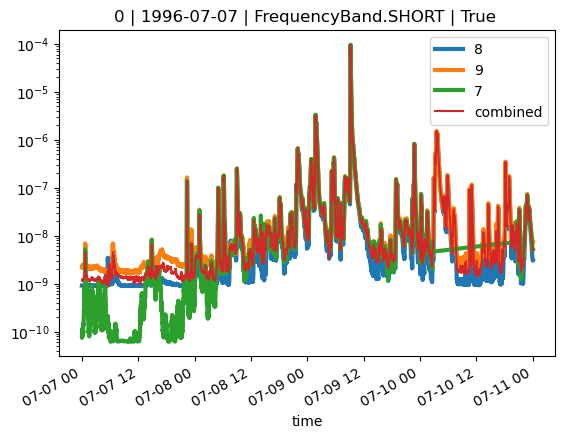

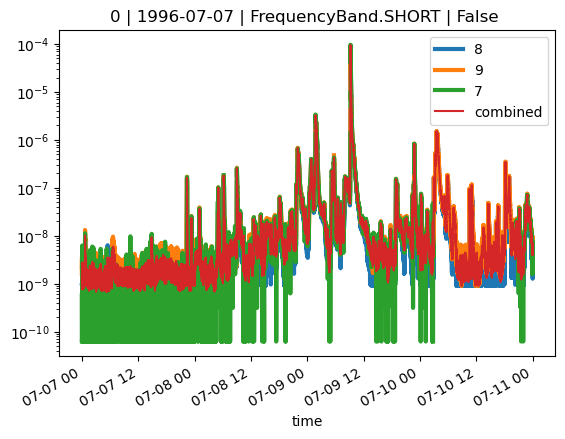

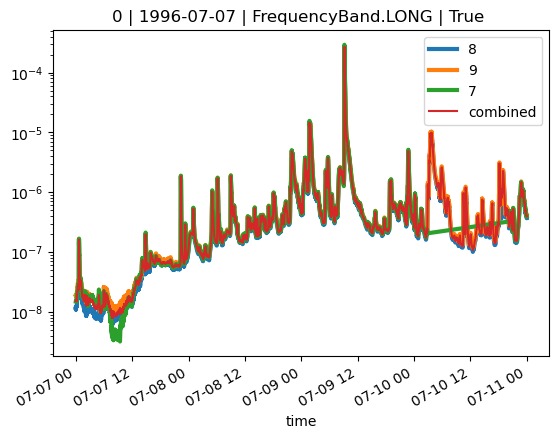

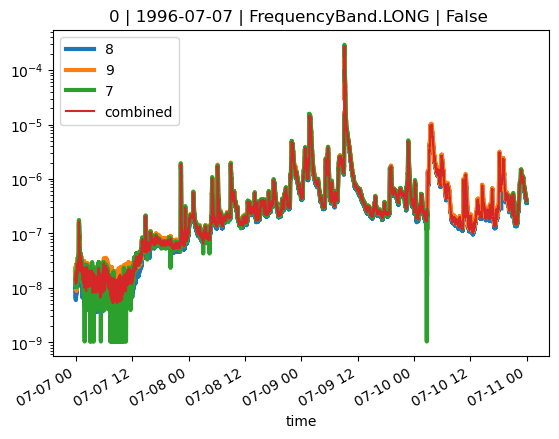

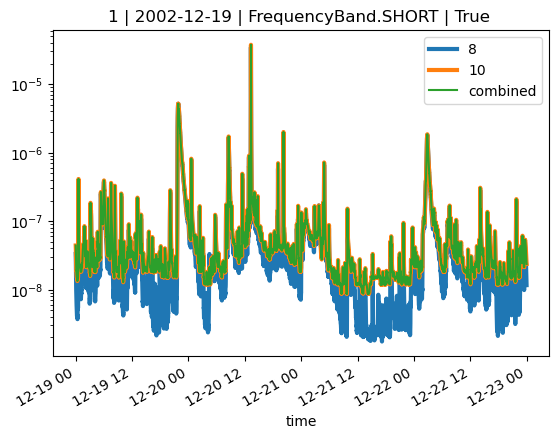

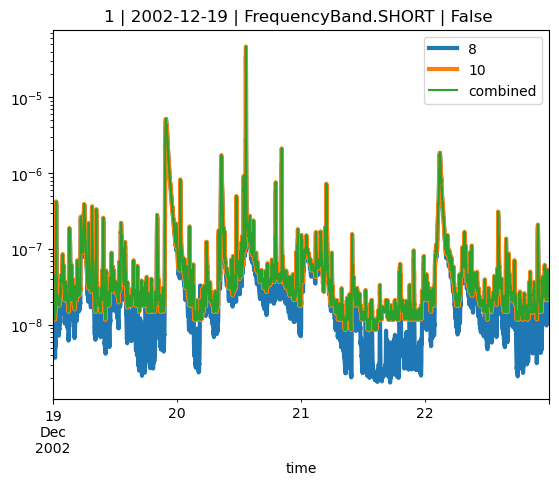

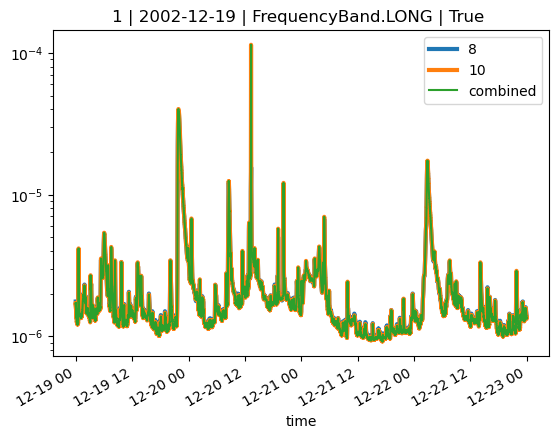

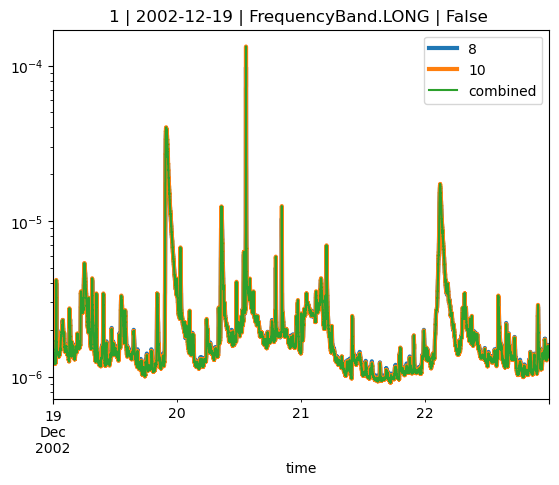

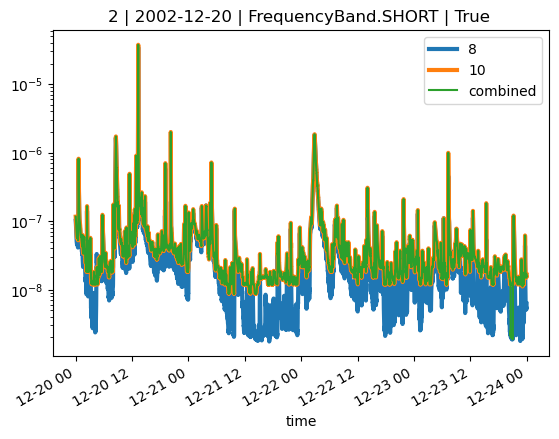

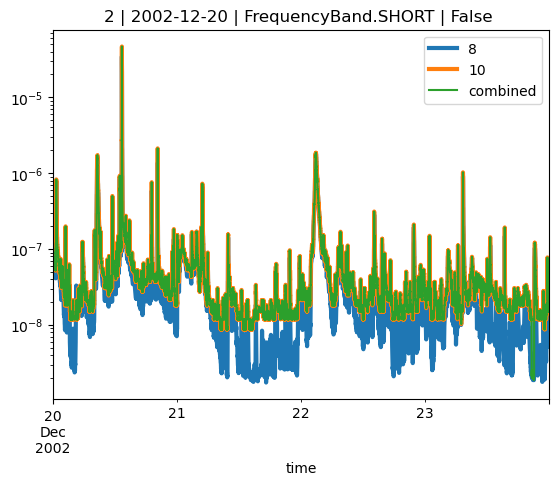

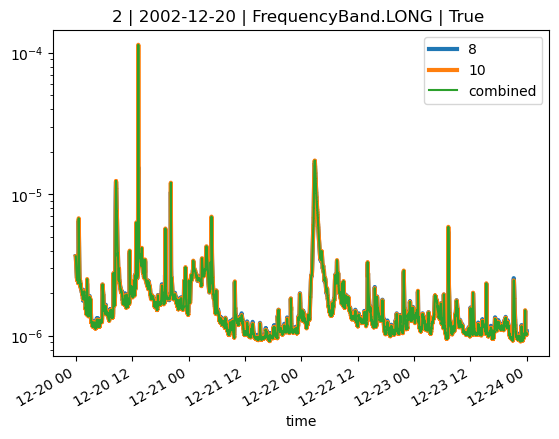

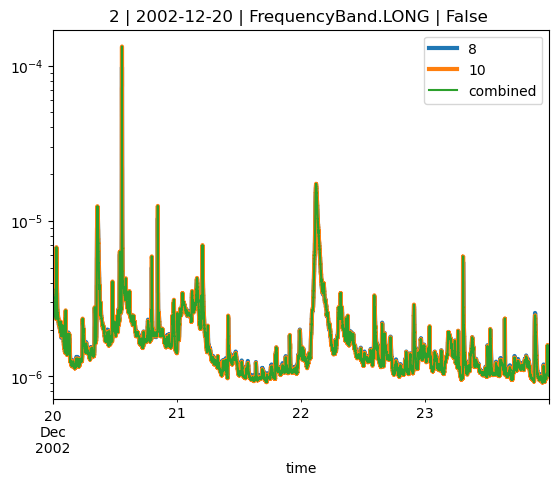

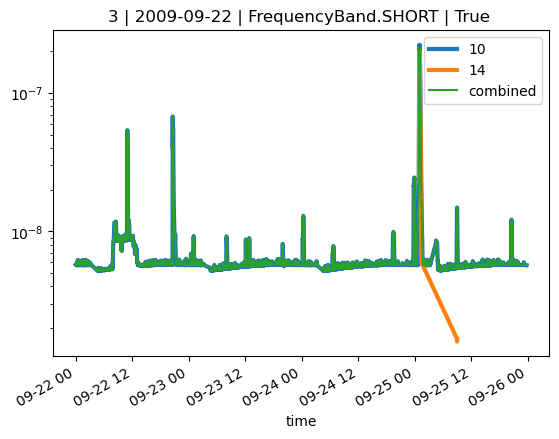

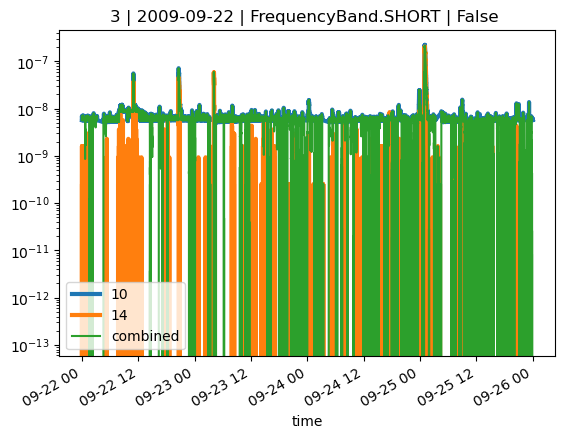

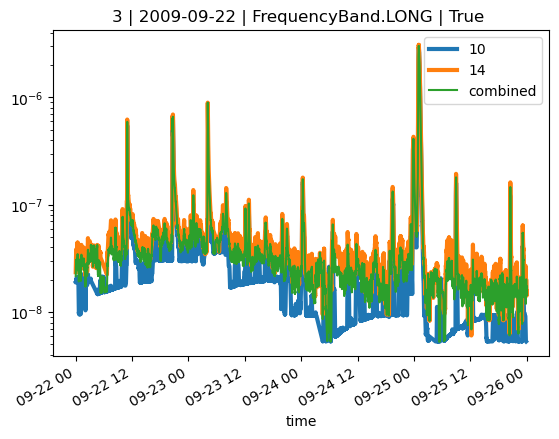

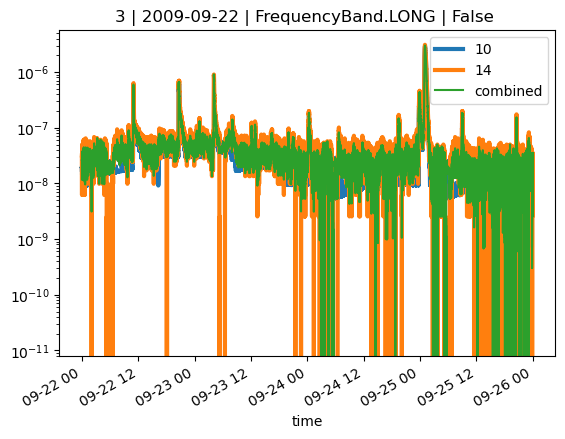

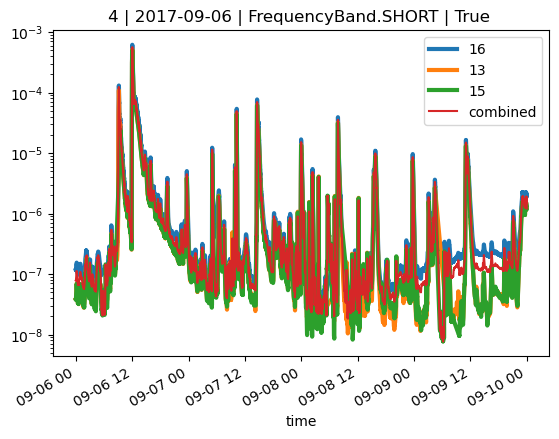

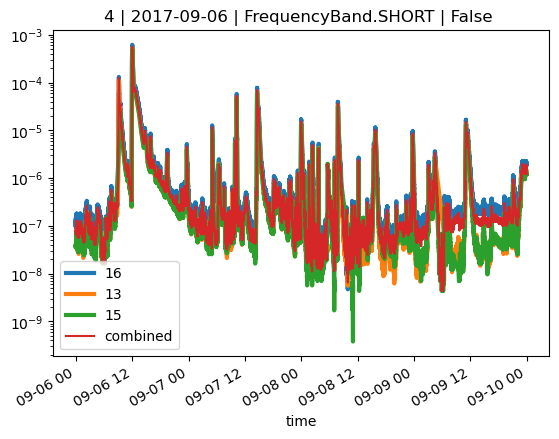

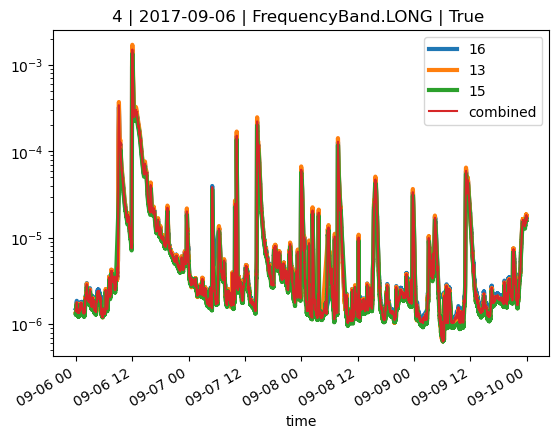

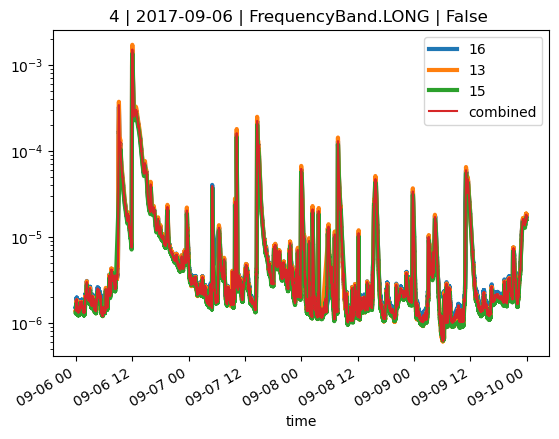

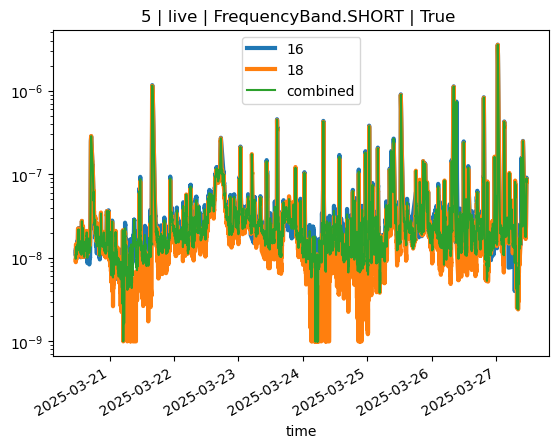

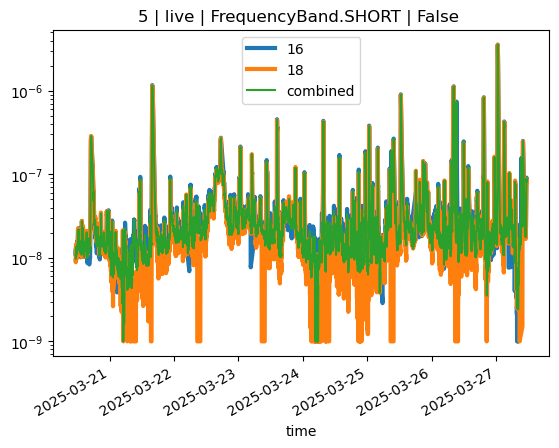

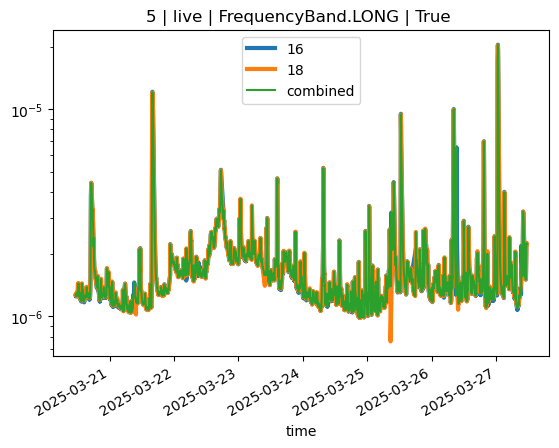

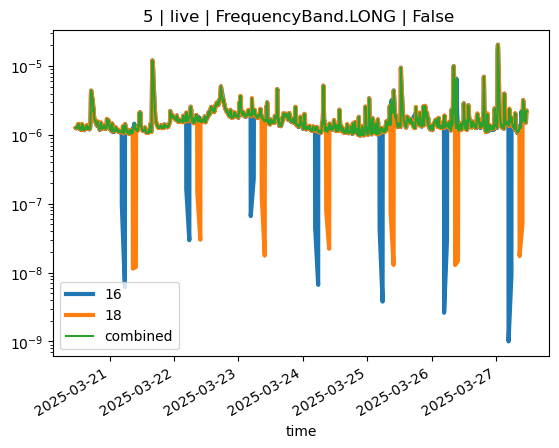

In [6]:
from data.flux.spec.channel import FluxChannel, SATELLITE_COMBINED_ID
import importlib
import importer.flux._combine as combine_module

# Reload modules for easier development
importlib.reload(combine_module)
combine_flux_channels = combine_module.combine_flux_channels

for i, (channels, time_range, label) in enumerate(sections):
    combined = combine_flux_channels(channels, time_range)
    for band in (FrequencyBand.SHORT, FrequencyBand.LONG):
        for is_cleaned in (True, False):
            source_channels = {
                channel: flux
                for channel, flux in channels.items()
                if channel.band == band and channel.is_clean == is_cleaned
            }
            if len(source_channels) == 0:
                continue

            for channel, flux in source_channels.items():
                flux.rename(str(channel.satellite)).plot(
                    logy=True, linewidth=3
                )
            combined_channel = combined[FluxChannel(SATELLITE_COMBINED_ID, band, is_cleaned)]
            combined_channel.rename('combined').plot(logy=True)
            plt.title(f'{i} | {label} | {band} | {is_cleaned} ')
            plt.legend()
            plt.show()